In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rn
import seaborn as sns

# visualization
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sui = pd.read_csv('/home/otavio/ml/datasets/world-data/suicide/suicide-rate-1990-2017.csv')
work = pd.read_csv('/home/otavio/ml/datasets/world-data/annual-hours-worked.csv')

In [3]:
sui = sui[sui['Year'] == 2017]
work = work[work['Year'] == 2016]

In [4]:
work = work.rename(columns={' (Annual hours worked per worker)':'wh'})

In [5]:
sui = sui.drop('Suicide rate in 1990 (deaths per 100,000)', axis=1).rename(columns={'Suicide rate (deaths per 100,000)':'rate'})

In [6]:
sui = sui[sui['Code'].notnull()]

In [7]:
work.sort_values('wh', ascending=False, inplace=True)
sui

,Entity,Code,Year,rate
27,Afghanistan,AFG,2017,9.188568
55,Albania,ALB,2017,5.108781
83,Algeria,DZA,2017,4.124306
111,American Samoa,ASM,2017,6.738545
167,Andorra,AND,2017,7.912273
...,...,...,...,...
6271,Vietnam,VNM,2017,7.422038
6383,World,OWID_WRL,2017,9.976258
6411,Yemen,YEM,2017,6.013435
6439,Zambia,ZMB,2017,13.060061


In [8]:
data = sui.merge(work, on='Entity')
data

,Entity,Code_x,Year_x,rate,Code_y,Year_y,wh
0,Argentina,ARG,2017,10.609682,ARG,2016,1743.30
1,Armenia,ARM,2017,8.263799,ARM,2016,1842.00
2,Australia,AUS,2017,11.046885,AUS,2016,1785.58
3,Austria,AUT,2017,11.202157,AUT,2016,1623.29
4,Bangladesh,BGD,2017,6.032121,BGD,2016,2371.81
...,...,...,...,...,...,...,...
62,United Kingdom,GBR,2017,7.356321,GBR,2016,1679.76
63,United States,USA,2017,12.835757,USA,2016,1774.69
64,Uruguay,URY,2017,16.818157,URY,2016,1576.27
65,Venezuela,VEN,2017,8.677951,VEN,2016,1777.85


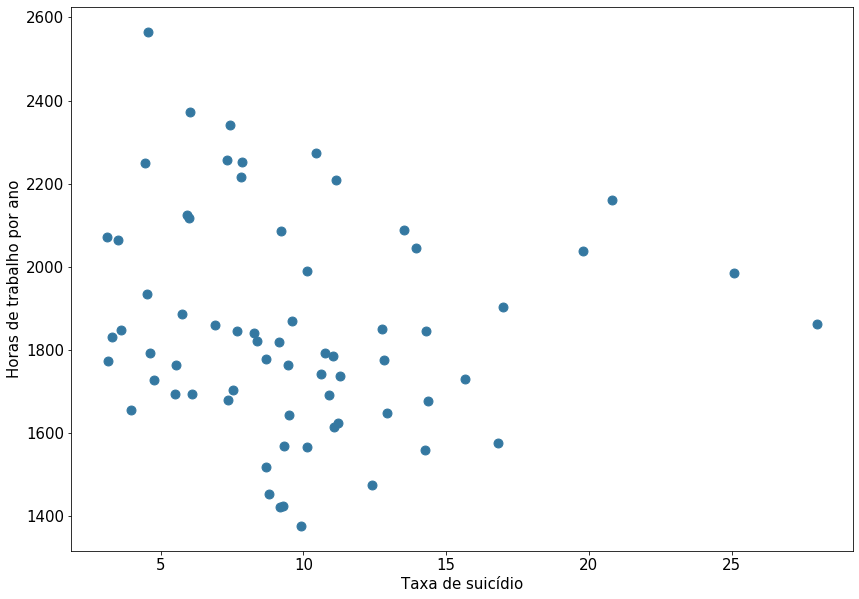

In [9]:
ax, fig = plt.subplots(figsize=(14, 10))
plt.scatter(data['rate'], data['wh'], c='#3478A1', s=80)
plt.ylabel('Horas de trabalho por ano', size=15)
plt.xlabel('Taxa de suicídio', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.savefig('out2.png')

In [10]:
data.corr()

,Year_x,rate,Year_y,wh
Year_x,NaN,NaN,NaN,NaN
rate,NaN,1.000000,NaN,-0.095743
Year_y,NaN,NaN,NaN,NaN
wh,NaN,-0.095743,NaN,1.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 0 to 66
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Entity  67 non-null     object 
 1   Code_x  67 non-null     object 
 2   Year_x  67 non-null     int64  
 3   rate    67 non-null     float64
 4   Code_y  67 non-null     object 
 5   Year_y  67 non-null     int64  
 6   wh      67 non-null     float64
dtypes: float64(2), int64(2), object(3)
memory usage: 4.2+ KB


In [12]:
cou = pd.read_csv('/home/otavio/ml/datasets/utils/countries.csv')
cou.drop(['Index', 'Code'], inplace=True, axis=1)
cou

,Name,PT
0,Afghanistan,Afeganistão
1,Aland Islands,Ilhas Aland
2,Albania,Albânia
3,Algeria,Argélia
4,American Samoa,Samoa Americana
...,...,...
249,Butan,Butão
250,England,Inglaterra
251,Democratic People's Republic of Korea,Coréia do Norte
252,Vietnam,Vietnã


In [13]:
data = data.merge(cou, how='left', left_on='Entity', right_on='Name')
data

,Entity,Code_x,Year_x,rate,Code_y,Year_y,wh,Name,PT
0,Argentina,ARG,2017,10.609682,ARG,2016,1743.30,Argentina,Argentina
1,Armenia,ARM,2017,8.263799,ARM,2016,1842.00,Armenia,Armênia
2,Australia,AUS,2017,11.046885,AUS,2016,1785.58,Australia,Austrália
3,Austria,AUT,2017,11.202157,AUT,2016,1623.29,Austria,Áustria
4,Bangladesh,BGD,2017,6.032121,BGD,2016,2371.81,Bangladesh,Bangladesh
...,...,...,...,...,...,...,...,...,...
62,United Kingdom,GBR,2017,7.356321,GBR,2016,1679.76,United Kingdom,Reino Unido
63,United States,USA,2017,12.835757,USA,2016,1774.69,United States,Estados Unidos
64,Uruguay,URY,2017,16.818157,URY,2016,1576.27,Uruguay,Uruguai
65,Venezuela,VEN,2017,8.677951,VEN,2016,1777.85,Venezuela,Venezuela


In [14]:
data = data.sort_values('rate', ascending=False)
data = data.reset_index(drop=True)
rank1 = data[:5]
rank2 = data[data['Entity'] == 'Brazil']
rank3 = data[-5:]
rank = pd.concat([rank1, rank2, rank3])
rank.index = rank.index + 1
rank['label'] = rank['PT'] + ' (' + rank.index.astype(str) + 'º)'
rank

,Entity,Code_x,Year_x,rate,Code_y,Year_y,wh,Name,PT,label
1,Lithuania,LTU,2017,27.990584,LTU,2016,1861.36,Lithuania,Lituânia,Lituânia (1º)
2,Russia,RUS,2017,25.087669,RUS,2016,1985.00,Russia,Rússia,Rússia (2º)
3,South Korea,KOR,2017,20.805660,KOR,2016,2161.05,South Korea,Coreia do Sul,Coreia do Sul (3º)
4,Sri Lanka,LKA,2017,19.800419,LKA,2016,2038.54,Sri Lanka,Sri Lanka,Sri Lanka (4º)
5,Latvia,LVA,2017,16.988674,LVA,2016,1903.48,Latvia,Letônia,Letônia (5º)
50,Brazil,BRA,2017,6.089304,BRA,2016,1694.99,Brazil,Brasil,Brasil (50º)
63,Jamaica,JAM,2017,3.606516,JAM,2016,1848.72,Jamaica,Jamaica,Jamaica (63º)
64,Greece,GRC,2017,3.506254,GRC,2016,2064.67,Greece,Grécia,Grécia (64º)
65,Turkey,TUR,2017,3.310770,TUR,2016,1832.00,Turkey,Peru,Peru (65º)
66,Peru,PER,2017,3.138703,PER,2016,1773.25,Peru,Peru,Peru (66º)


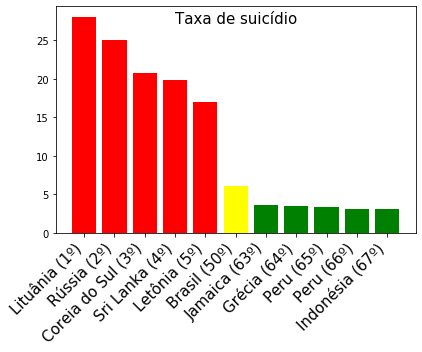

In [20]:
ax, fig = plt.subplots(figsize=(6, 5))
plt.bar(rank['label'][:5], rank['rate'][:5], color='red')
plt.bar(rank[rank['Entity'] == 'Brazil']['label'], rank[rank['Entity'] == 'Brazil']['rate'], color='yellow')
plt.bar(rank['label'][-5:], rank['rate'][-5:], color='green')
plt.xticks(rotation=45, horizontalalignment='right', size=15)
plt.title('Taxa de suicídio', x=0.5, y=0.90, size=15)
plt.tight_layout()
plt.savefig('ranksui.png')

In [16]:
data.sort_values('wh', ascending=False, inplace=True)
data.reset_index(drop=True, inplace=True)
data.index = data.index + 1
data['label'] = data['PT'] + ' (' + data.index.astype(str) + 'º)'
data

,Entity,Code_x,Year_x,rate,Code_y,Year_y,wh,Name,PT,label
1,Cambodia,KHM,2017,4.544303,KHM,2016,2565.01,Cambodia,Camboja,Camboja (1º)
2,Bangladesh,BGD,2017,6.032121,BGD,2016,2371.81,Bangladesh,Bangladesh,Bangladesh (2º)
3,Vietnam,VNM,2017,7.422038,VNM,2016,2339.95,Vietnam,Vietnã,Vietnã (3º)
4,Thailand,THA,2017,10.442473,THA,2016,2273.29,Thailand,Tailândia,Tailândia (4º)
5,Singapore,SGP,2017,7.327118,SGP,2016,2257.42,Singapore,Cingapura,Cingapura (5º)
...,...,...,...,...,...,...,...,...,...,...
63,France,FRA,2017,12.400298,FRA,2016,1474.04,France,França,França (63º)
64,Denmark,DNK,2017,8.800280,DNK,2016,1454.00,Denmark,Dinamarca,Dinamarca (64º)
65,Norway,NOR,2017,9.268806,NOR,2016,1423.93,Norway,Noruega,Noruega (65º)
66,Netherlands,NLD,2017,9.169106,NLD,2016,1423.02,Netherlands,Países Baixos,Países Baixos (66º)


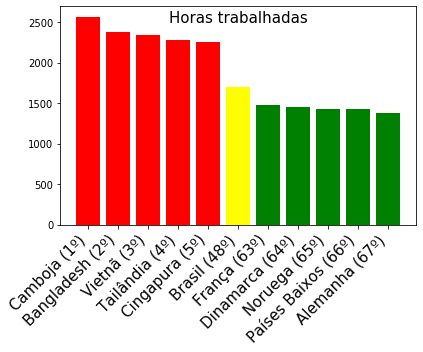

In [19]:
ax, fig = plt.subplots(figsize=(6, 5))
bars = plt.bar(data['label'][:5], data['wh'][:5], color='red')
plt.bar(data[data['Entity'] == 'Brazil']['label'], data[data['Entity'] == 'Brazil']['wh'], color='yellow')
plt.bar(data['label'][-5:], data['wh'][-5:], color='green')
plt.xticks(rotation=45, horizontalalignment='right', size=15)
plt.title('Horas trabalhadas', x=0.5, y=0.90, size=15)
plt.tight_layout()
plt.savefig('rankwh.png')

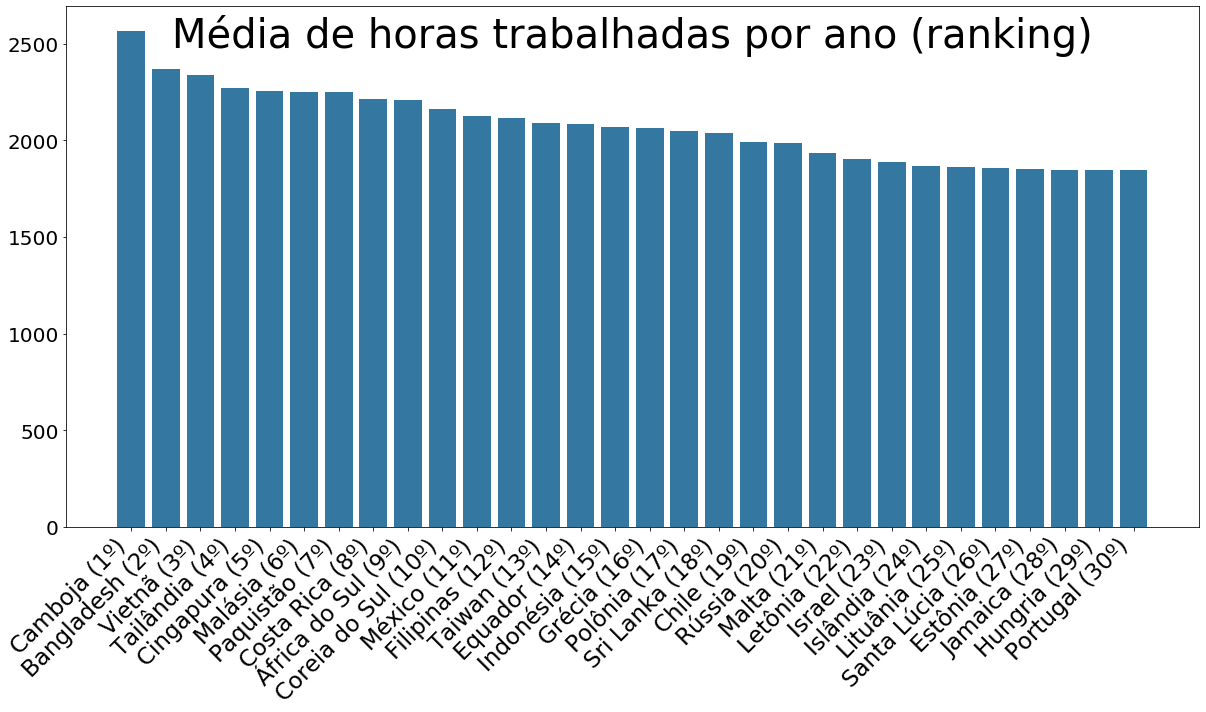

In [47]:
ax, fig = plt.subplots(figsize=(17, 10))
bars = plt.bar(data['label'][:30], data['wh'][:30], color='#3478A1')
plt.xticks(rotation=45, horizontalalignment='right', size=23)
plt.yticks(size=20)
plt.title('Média de horas trabalhadas por ano (ranking)', x=0.5, y=0.91, size=40)
plt.tight_layout()
plt.savefig('rank20.png')